# Exploratory Data Analysis: Advanced Visualisations

## Objectives

* Advanced EDA Graphs to visualise the data set

## Inputs

* Dataset used filtered_accident_data_set.csv

## Outputs

* Scatter Map: Accident Locations by Severity
* Temporal Analysis: Accident Trends Over Time
* Accident Severity by Road Type
* Impact of Light Conditions on Accidents


# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [ ]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\nmnko\\Documents\\Hackathon 3 Team 2\\UK-Road-Accident-Analysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [ ]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [ ]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\nmnko\\Documents\\Hackathon 3 Team 2\\UK-Road-Accident-Analysis'

# Section 1

In [ ]:
# Import required libaries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data 
file_path = "filtered_accident_data_set.csv"  # file path 
df = pd.read_csv(file_path) 

# Display basic structure 
print("Dataset Shape:", df.shape)  
print("First few rows:\n", df.head()) 

Dataset Shape: (31494, 13)
First few rows:
            Index Accident_Severity Accident Date   Latitude  \
0  200720D003001            Slight    02-01-2019  52.513668   
1  200720D003101            Slight    02-01-2019  52.502396   
2  200720D003802           Serious    03-01-2019  52.563201   
3  200720D005801            Slight    02-01-2019  52.493431   
4  200720D005901            Slight    05-01-2019  52.510805   

        Light_Conditions District Area  Longitude  Number_of_Casualties  \
0  Darkness - lights lit    Birmingham  -1.901975                     1   
1               Daylight    Birmingham  -1.867086                     1   
2               Daylight    Birmingham  -1.822793                     1   
3               Daylight    Birmingham  -1.818507                     1   
4  Darkness - lights lit    Birmingham  -1.834202                     1   

   Number_of_Vehicles Road_Surface_Conditions           Road_Type  \
0                   2             Wet or damp    Dual car

---
---

1. Scatter Map: Accident Locations by Severity
* It helps identify how many accidents fall into each severity category (Slight, Serious, Fatal).

In [ ]:
import plotly.express as px


# 1. Scatter Map: Accident Locations by Severity
fig3 = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", color="Accident_Severity",
                         title="Accident Locations by Severity", mapbox_style="open-street-map",
                         hover_data=['Accident Date'])
fig3.show()


2. Temporal Analysis: Accident Trends Over Time
* This helps identify any seasonal or daily trends in accident occurrences.
* Helps uncover peak accident periods

In [ ]:
import pandas as pd
import plotly.express as px

# Convert Accident Date to datetime format
df['Accident Date'] = pd.to_datetime(df['Accident Date'], dayfirst=True)

# Count number of accidents per day
df_time = df.groupby("Accident Date").size().reset_index(name="Accident Count")

# Create line chart
fig = px.line(df_time, x="Accident Date", y="Accident Count", 
              title="Trend of Accidents Over Time")
fig.show()


c:\Users\nmnko\AppData\Local\Programs\Python\Python312\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



3. Accident Severity by Road Type
* Certain road types may have more severe accidents.

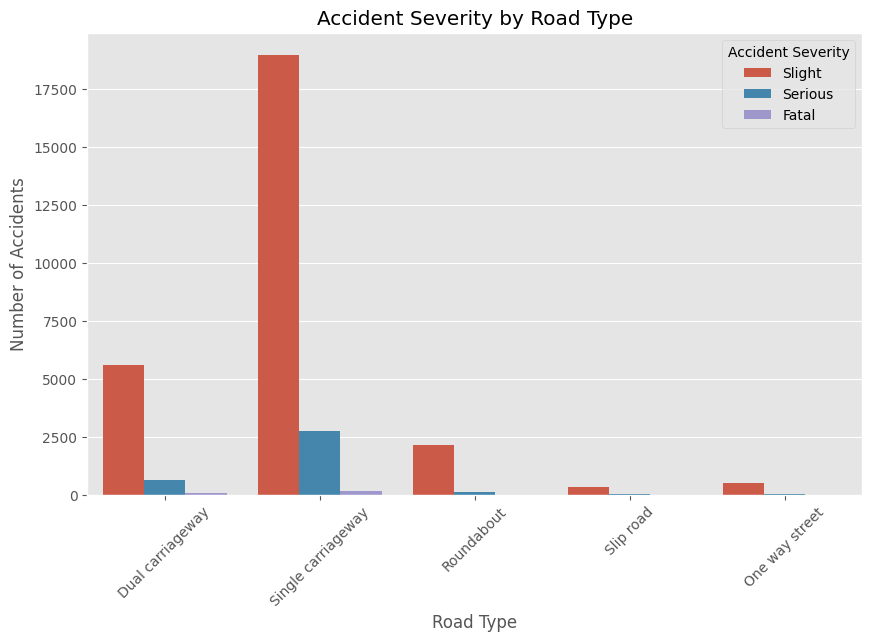

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use("ggplot")

# Create a count plot for Road Type and Accident Severity
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Road_Type", hue="Accident_Severity")

# Add labels and title
plt.xlabel("Road Type")
plt.ylabel("Number of Accidents")
plt.title("Accident Severity by Road Type")
plt.xticks(rotation=45)
plt.legend(title="Accident Severity")

# Show plot
plt.show()



4. Impact of Light Conditions on Accidents
* Accidents might be more frequent in low-light conditions.

C:\Users\nmnko\AppData\Local\Temp\ipykernel_7284\2041723189.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




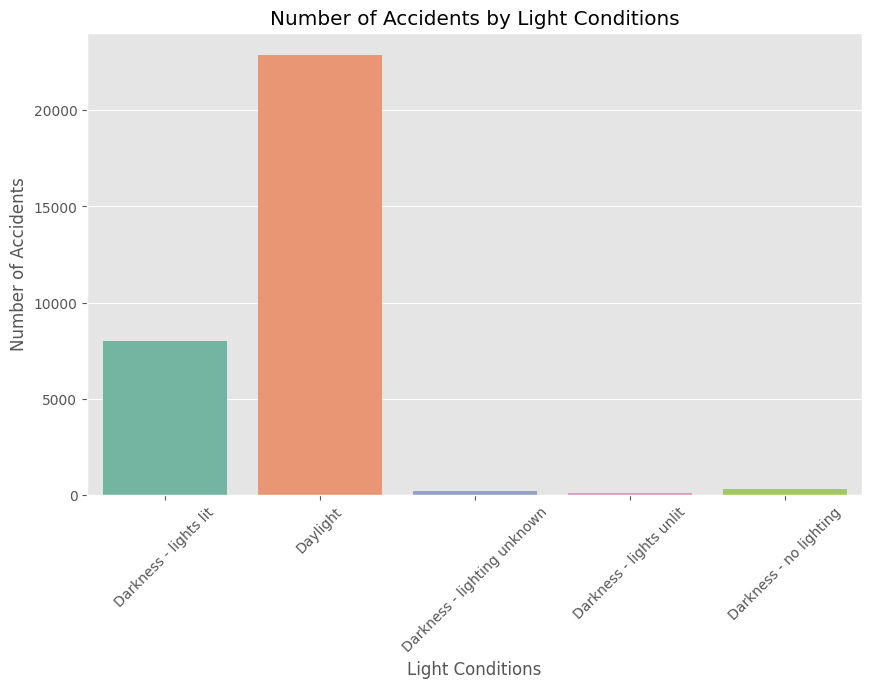

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use("ggplot")

# Create a count plot for Light Conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Light_Conditions", palette="Set2")

# Add labels and title
plt.xlabel("Light Conditions")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents by Light Conditions")
plt.xticks(rotation=45)

# Show plot
plt.show()



In [ ]:
df.head()

Index Accident_Severity Accident Date   Latitude  \
0  200720D003001            Slight    02-01-2019  52.513668   
1  200720D003101            Slight    02-01-2019  52.502396   
2  200720D003802           Serious    03-01-2019  52.563201   
3  200720D005801            Slight    02-01-2019  52.493431   
4  200720D005901            Slight    05-01-2019  52.510805   

        Light_Conditions District Area  Longitude  Number_of_Casualties  \
0  Darkness - lights lit    Birmingham  -1.901975                     1   
1               Daylight    Birmingham  -1.867086                     1   
2               Daylight    Birmingham  -1.822793                     1   
3               Daylight    Birmingham  -1.818507                     1   
4  Darkness - lights lit    Birmingham  -1.834202                     1   

   Number_of_Vehicles Road_Surface_Conditions           Road_Type  \
0                   2             Wet or damp    Dual carriageway   
1                   2             Wet or damp  Single carriageway   
2                   1                     Dry  Single carriageway   
3                   2             Wet or damp    Dual carriageway   
4                   3                     Dry    Dual carriageway   

  Urban_or_Rural_Area Vehicle_Type  
0               Urban          Car  
1               Urban          Car  
2               Urban          Car  
3               Urban          Car  
4               Urban          Car

5. Scatter plot by Number of Casualties by Vehicle Type and Road Surface Conditions

In [ ]:
df = pd.read_csv('filtered_accident_data_set.csv')
fig = px.scatter(df, x="Vehicle_Type", y="Number_of_Casualties", color="Road_Surface_Conditions",
                 title="Number_of_Casualties by Vehicle_Type and Road_Surface_Conditions",
                 labels={"Longitude": "Longitude", "Latitude": "Latitude", "Accident_Severity": "Severity"},
                 hover_data=['Accident Date'])
fig.show() 

6.Correlation Heat Map of features

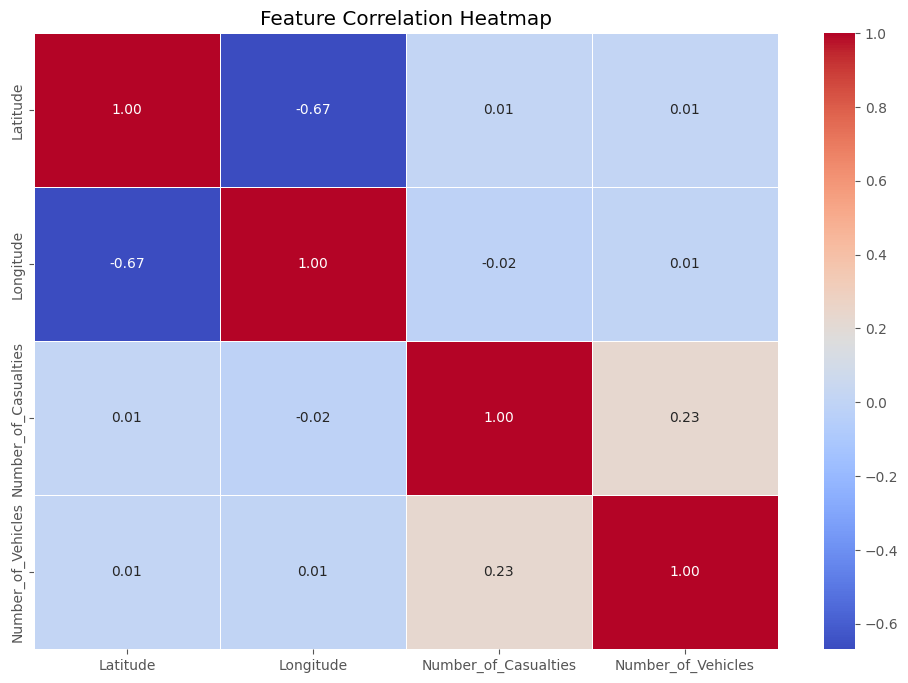

In [ ]:
df = pd.read_csv('filtered_accident_data_set.csv')
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()